In [1]:
import numpy as np
import matplotlib.pyplot as plt
import desimodel.io
from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
tiles = desimodel.io.load_tiles(onlydesi=False)
c = SkyCoord(ra=tiles['RA']*u.degree, dec=tiles['DEC']*u.degree)
galb = c.galactic[:].b.degree
ii = (tiles['PASS']==1) &  (np.abs(galb)>15.0)
tiles = tiles[ii] 
galb = galb[ii]

In [8]:
ra_spacing = np.arange(0,250,18)
dec_spacing = np.arange(-20,90,15)

ra_tiles = []
dec_tiles = []
galb_tiles = [] 
tileid_tiles = [] 
nstars_tiles = []
indesi_tiles = []
for ra in ra_spacing:
    for dec in dec_spacing:
        r = np.abs(np.sqrt((tiles['RA']-ra)**2 + (tiles['DEC']-dec)**2))
        ii = np.argmin(r)
        if r[ii]<3:
            ra_tiles.append(tiles['RA'][ii])
            dec_tiles.append(tiles['DEC'][ii])
            galb_tiles.append(galb[ii])
            tileid_tiles.append(tiles['TILEID'][ii])
            nstars_tiles.append(-1)
            indesi_tiles.append(tiles['IN_DESI'][ii])
            
indesi_tiles = np.array(indesi_tiles)
ra_tiles = np.array(ra_tiles)
dec_tiles = np.array(dec_tiles)

T = np.array([tileid_tiles, ra_tiles, dec_tiles, galb_tiles, nstars_tiles, indesi_tiles])
np.savetxt('dither_zero_list.txt', T.T, 
           fmt='%d\t %f\t %f\t %f\t %d\t %d', 
          header='TILEID  RA      DEC     GALB   STARS  IN_IMAGING')

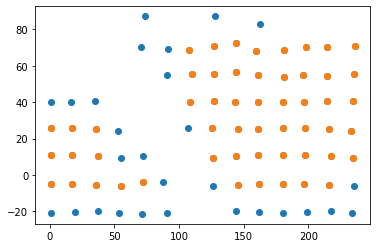

In [9]:
plt.scatter(ra_tiles, dec_tiles)
plt.scatter(ra_tiles[indesi_tiles==1], dec_tiles[indesi_tiles==1])

In [10]:
print(len(ra_tiles))

82


In [ ]:
tmp = np.loadtxt('cmx_dither_list.txt')

In [ ]:
np.min(np.abs(tmp[:,3]))